Import packages

In [479]:
import pandas as pd

Import datsets

In [480]:
natural_disasters = pd.read_csv('naturaldisasters.csv', on_bad_lines='skip')
home_data = pd.read_csv('home_insurace_premiums.csv', on_bad_lines='skip')
commercial_data = pd.read_csv('commercial _insurance_premiums.csv', on_bad_lines='skip')
inflation_data = pd.read_csv('US_Inflation.csv', on_bad_lines='skip')

Data tidying and recoding

In [481]:
# check for missing values
print("Natural Disaster missing values:")
print(natural_disasters.isnull().sum())

print("\nHome insurance premiums missing values:")
print(home_data.isnull().sum())

print("\nCommercial insurance premiums missing values:")
print(commercial_data.isnull().sum())

print("\nInflation data missing values:")
print(inflation_data.isnull().sum())

Natural Disaster missing values:
id                  0
country             0
iso3              315
gwno              434
year                0
geo_id              0
geolocation         0
level               0
adm1                0
adm2            25883
adm3            37543
location            0
historical          0
hist_country    39717
disastertype        0
disasterno          0
latitude            0
longitude           0
dtype: int64

Home insurance premiums missing values:
observation_date    0
PCU9241269241262    0
dtype: int64

Commercial insurance premiums missing values:
observation_date    0
PCU9241269241265    0
dtype: int64

Inflation data missing values:
observation_date    0
FPCPITOTLZGUSA      0
dtype: int64


In [482]:
# Summary of each dataset
print("Natural Disaster Data summary:")
print(natural_disasters.info())
print(natural_disasters.describe())

print("\nHome insurance data summary:")
print(home_data.info())
print(home_data.describe())

print("\nCommercial insurance data summary:")
print(commercial_data.info())
print(commercial_data.describe())

print("\nInflation data summary:")
print(inflation_data.info())
print(inflation_data.describe())

Natural Disaster Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39953 entries, 0 to 39952
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            39953 non-null  object 
 1   country       39953 non-null  object 
 2   iso3          39638 non-null  object 
 3   gwno          39519 non-null  float64
 4   year          39953 non-null  int64  
 5   geo_id        39953 non-null  int64  
 6   geolocation   39953 non-null  object 
 7   level         39953 non-null  int64  
 8   adm1          39953 non-null  object 
 9   adm2          14070 non-null  object 
 10  adm3          2410 non-null   object 
 11  location      39953 non-null  object 
 12  historical    39953 non-null  int64  
 13  hist_country  236 non-null    object 
 14  disastertype  39953 non-null  object 
 15  disasterno    39953 non-null  object 
 16  latitude      39953 non-null  float64
 17  longitude     39953 non-null  float64


Rename and drop variables

In [483]:
inflation_data.rename(columns={"FPCPITOTLZGUSA": "inflation_rate"}, inplace=True)

home_data.rename(columns={"PCU9241269241262": "Home_Insurance_PPI"}, inplace=True)

commercial_data.rename(columns={"PCU9241269241265": "Commercial_Insurance_PPI"}, inplace=True)

natural_disasters = natural_disasters.rename(columns={"id": "disaster_id"})
natural_disasters = natural_disasters[natural_disasters["country"] == "United States"]
natural_disasters = natural_disasters[[
    "disaster_id", "country", "iso3", "year", "geo_id", "geolocation",
    "location", "disastertype", "latitude", "longitude"
]]

Fix date format to be consistant 

In [484]:
# observation_date to standardized datetime format
home_data["observation_date"] = pd.to_datetime(home_data["observation_date"], errors='coerce')
commercial_data["observation_date"] = pd.to_datetime(commercial_data["observation_date"], errors='coerce')
inflation_data["observation_date"] = pd.to_datetime(inflation_data["observation_date"], errors='coerce')

# check
print("Rows with invalid dates in home_data:", home_data[home_data["observation_date"].isna()])
print("Rows with invalid dates in commercial_data:", commercial_data[commercial_data["observation_date"].isna()])
print("Rows with invalid dates in inflation_data:", inflation_data[inflation_data["observation_date"].isna()])

# drop rows with missing observation dates
home_data.dropna(subset=["observation_date"], inplace=True)
commercial_data.dropna(subset=["observation_date"], inplace=True)
inflation_data.dropna(subset=["observation_date"], inplace=True)


Rows with invalid dates in home_data: Empty DataFrame
Columns: [observation_date, Home_Insurance_PPI]
Index: []
Rows with invalid dates in commercial_data: Empty DataFrame
Columns: [observation_date, Commercial_Insurance_PPI]
Index: []
Rows with invalid dates in inflation_data: Empty DataFrame
Columns: [observation_date, inflation_rate]
Index: []


clean invalid dates

In [485]:
home_data.dropna(subset=["observation_date"], inplace=True)
commercial_data.dropna(subset=["observation_date"], inplace=True)
inflation_data.dropna(subset=["observation_date"], inplace=True)

Merge datasets

In [486]:
merged_data = pd.merge(home_data, commercial_data, on='observation_date', how='outer')
merged_data = pd.merge(merged_data, inflation_data, on='observation_date', how='outer')

#check merged dataset 
print(merged_data.shape)  
print(merged_data.head())


(358, 4)
  observation_date  Home_Insurance_PPI  Commercial_Insurance_PPI  \
0       1960-01-01                 NaN                       NaN   
1       1961-01-01                 NaN                       NaN   
2       1962-01-01                 NaN                       NaN   
3       1963-01-01                 NaN                       NaN   
4       1964-01-01                 NaN                       NaN   

   inflation_rate  
0        1.457976  
1        1.070724  
2        1.198773  
3        1.239669  
4        1.278912  


Add Year column for easier testing of data between all datasets and merge natural disasters dataset

In [487]:
merged_data['year'] = merged_data['observation_date'].dt.year


merged_data = pd.merge(merged_data, natural_disasters, on='year', how='outer')

# Check final merged dataset
print(merged_data.shape)
print(merged_data.head())
print(merged_data.columns)

(33373, 14)
  observation_date  Home_Insurance_PPI  Commercial_Insurance_PPI  \
0       1960-01-01                 NaN                       NaN   
1       1961-01-01                 NaN                       NaN   
2       1962-01-01                 NaN                       NaN   
3       1963-01-01                 NaN                       NaN   
4       1963-01-01                 NaN                       NaN   

   inflation_rate  year disaster_id        country iso3   geo_id geolocation  \
0        1.457976  1960        6533  United States  USA  23740.0      Hawaii   
1        1.070724  1961        6535  United States  USA  25725.0       Texas   
2        1.198773  1962         NaN            NaN  NaN      NaN         NaN   
3        1.239669  1963     01-1368  United States  USA  28763.0      Gaines   
4        1.239669  1963     01-1368  United States  USA  28764.0     Georgia   

       location disastertype   latitude   longitude  
0        Hawaii   earthquake  20.247671 -156

Inflation Rate Data Analysis and Visualization

   year  inflation_rate
0  1960        1.457976
1  1961        1.070724
2  1962        1.198773
3  1963        1.239669
4  1963        1.239669


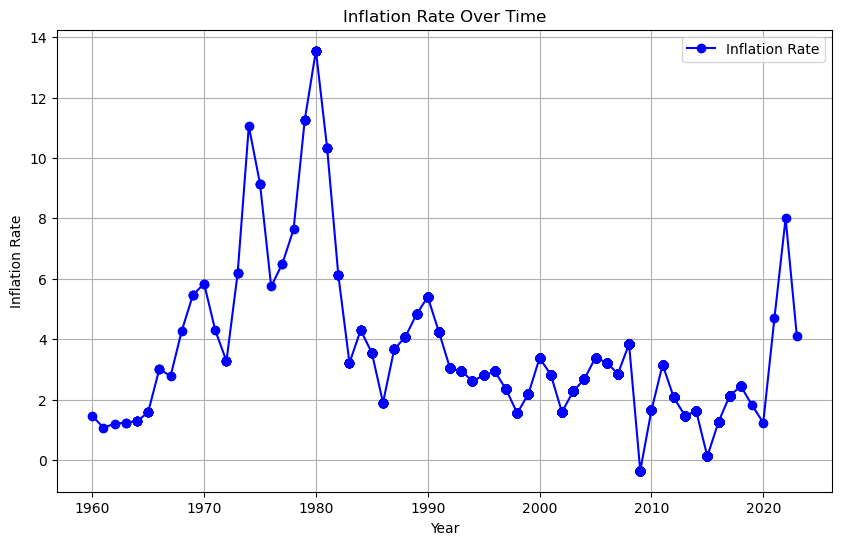

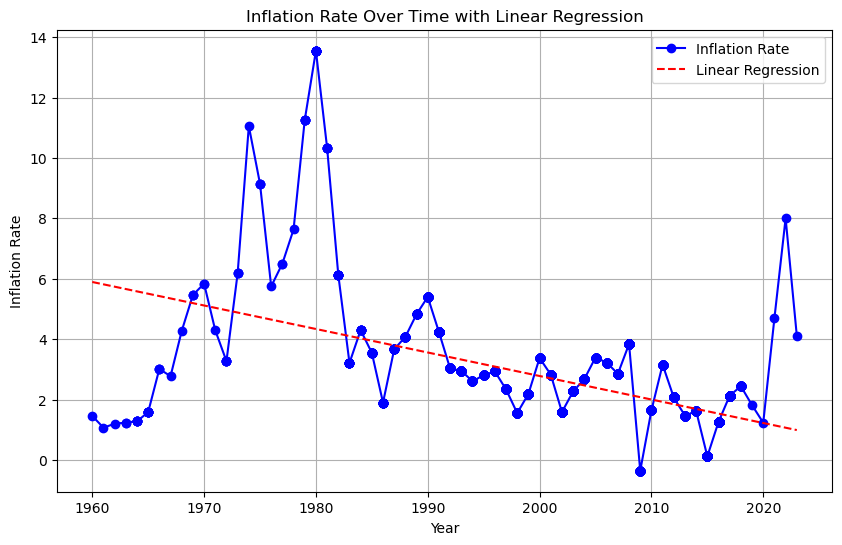

Inflation Linear Regression Slope: -0.0778145883775949


In [488]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print(merged_data[['year', 'inflation_rate']].head())
merged_data = merged_data.dropna(subset=['inflation_rate'])

# inflation rate over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['year'], merged_data['inflation_rate'], marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()


# linear regression
X = merged_data[['year']]  # independent variable (year)
y = merged_data['inflation_rate']  # dependent variable (inflation_rate)

inflation_model = LinearRegression()
inflation_model.fit(X, y)

merged_data['predicted_inflation_rate'] = inflation_model.predict(X)

# plot inflation rate with the linear regression line
plt.figure(figsize=(10, 6))
plt.plot(merged_data['year'], merged_data['inflation_rate'], marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.plot(merged_data['year'], merged_data['predicted_inflation_rate'], linestyle='--', color='r', label='Linear Regression')
plt.title('Inflation Rate Over Time with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()

print(f"Inflation Linear Regression Slope: {inflation_model.coef_[0]}")



Inflation since 2000

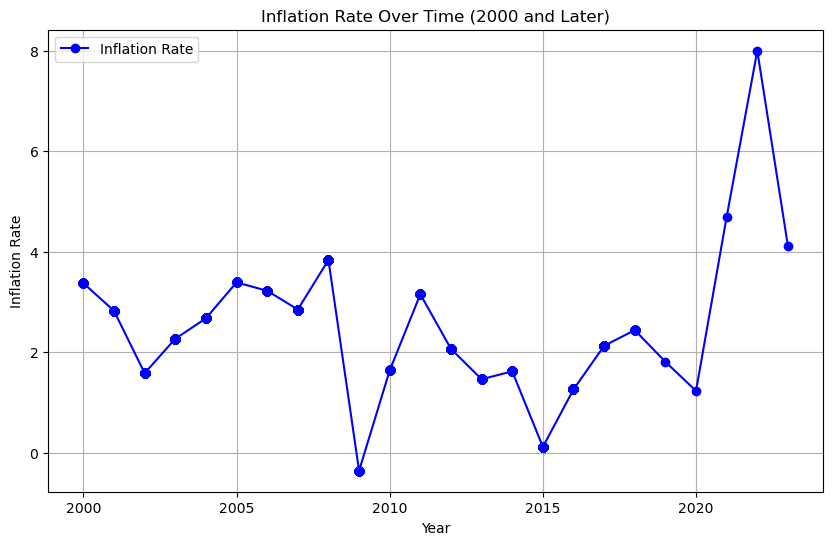

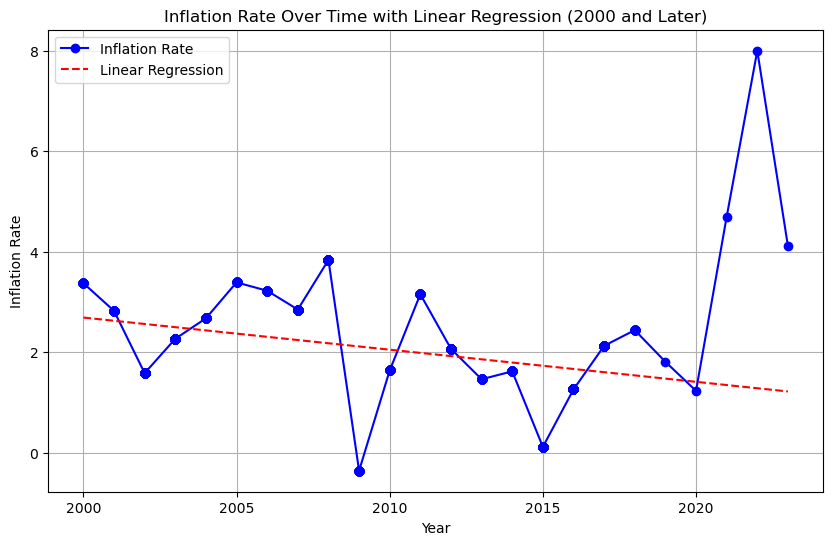

Inflation Linear Regression Slope (2000 and Later): -0.06395429870449372


In [489]:
# inflation rate over time (2000 and later)
plt.figure(figsize=(10, 6))
plt.plot(merged_data[merged_data['year'] >= 2000]['year'], 
         merged_data[merged_data['year'] >= 2000]['inflation_rate'], 
         marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.title('Inflation Rate Over Time (2000 and Later)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()

# linear regression
X = merged_data[merged_data['year'] >= 2000][['year']]  # independent variable (year)
y = merged_data[merged_data['year'] >= 2000]['inflation_rate']  # dependent variable (inflation_rate)

inflation_model = LinearRegression()
inflation_model.fit(X, y)

merged_data.loc[merged_data['year'] >= 2000, 'predicted_inflation_rate'] = inflation_model.predict(X)

# plot inflation rate with the linear regression line (2000 and later)
plt.figure(figsize=(10, 6))
plt.plot(merged_data[merged_data['year'] >= 2000]['year'], 
         merged_data[merged_data['year'] >= 2000]['inflation_rate'], 
         marker='o', linestyle='-', color='b', label='Inflation Rate')
plt.plot(merged_data[merged_data['year'] >= 2000]['year'], 
         merged_data[merged_data['year'] >= 2000]['predicted_inflation_rate'], 
         linestyle='--', color='r', label='Linear Regression')
plt.title('Inflation Rate Over Time with Linear Regression (2000 and Later)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.legend()
plt.show()

print(f"Inflation Linear Regression Slope (2000 and Later): {inflation_model.coef_[0]}")

Property Insurance Rates

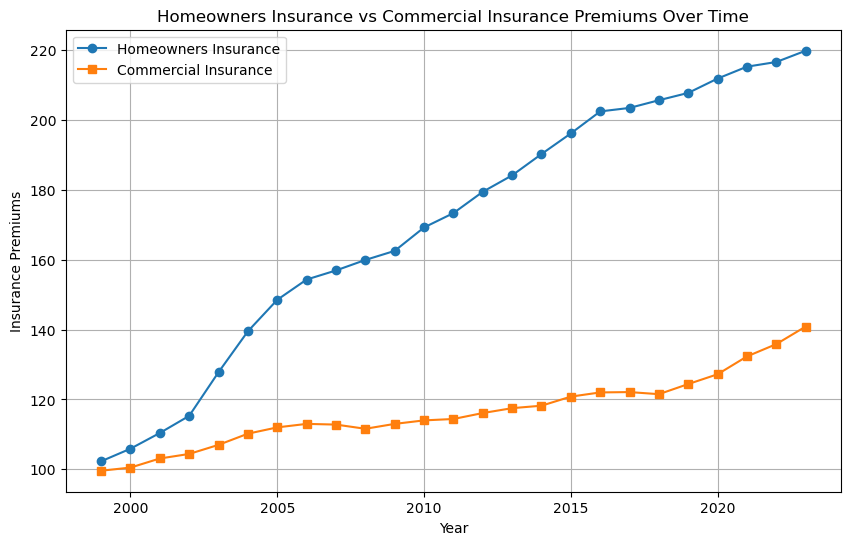

In [490]:
home_insurance_by_year = merged_data.groupby('year')['Home_Insurance_PPI'].mean()
commercial_insurance_by_year = merged_data.groupby('year')['Commercial_Insurance_PPI'].mean()

plt.figure(figsize=(10, 6))
plt.plot(home_insurance_by_year.index, home_insurance_by_year.values, marker='o', label='Homeowners Insurance')
plt.plot(commercial_insurance_by_year.index, commercial_insurance_by_year.values, marker='s', label='Commercial Insurance')

plt.title('Homeowners Insurance vs Commercial Insurance Premiums Over Time')
plt.xlabel('Year')
plt.ylabel('Insurance Premiums')
plt.legend()
plt.grid(True)
plt.show()


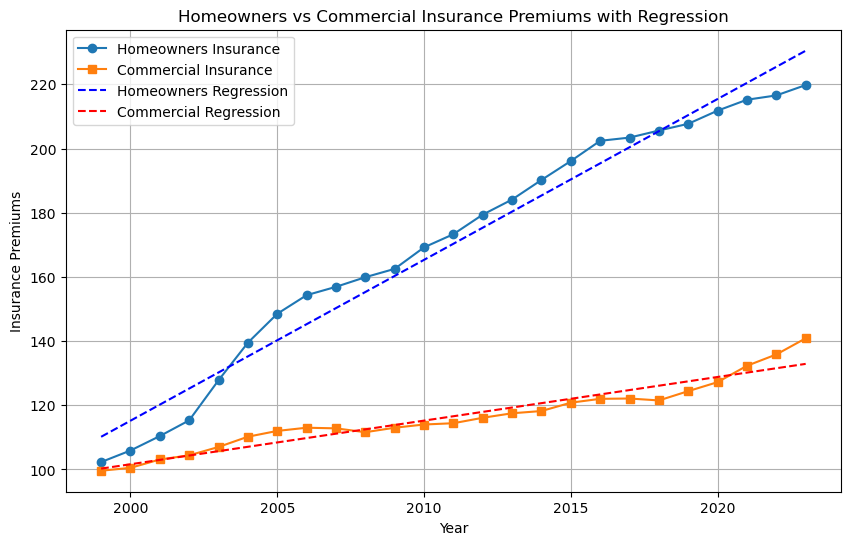

Home Insurance Linear Regression Slope: 5.012331538461537
Commercial Insurance Linear Regression Slope: 1.3597261538461534


In [491]:
# prepare data for regression
home_insurance_by_year = home_insurance_by_year.dropna()
commercial_insurance_by_year = commercial_insurance_by_year.dropna()

X_home = home_insurance_by_year.index.values.reshape(-1, 1)  # Independent variable (years)
y_home = home_insurance_by_year.values  # Dependent variable (Home Insurance Premiums)

X_commercial = commercial_insurance_by_year.index.values.reshape(-1, 1)  # Independent variable (years)
y_commercial = commercial_insurance_by_year.values  # Dependent variable (Commercial Insurance Premiums)

# fit linear regression models
home_model = LinearRegression()
home_model.fit(X_home, y_home)
home_predicted = home_model.predict(X_home)

commercial_model = LinearRegression()
commercial_model.fit(X_commercial, y_commercial)
commercial_predicted = commercial_model.predict(X_commercial)

# plot with regression lines
plt.figure(figsize=(10, 6))
plt.plot(home_insurance_by_year.index, home_insurance_by_year.values, marker='o', label='Homeowners Insurance')
plt.plot(commercial_insurance_by_year.index, commercial_insurance_by_year.values, marker='s', label='Commercial Insurance')
plt.plot(home_insurance_by_year.index, home_predicted, linestyle='--', color='blue', label='Homeowners Regression')
plt.plot(commercial_insurance_by_year.index, commercial_predicted, linestyle='--', color='red', label='Commercial Regression')

plt.title('Homeowners vs Commercial Insurance Premiums with Regression')
plt.xlabel('Year')
plt.ylabel('Insurance Premiums')
plt.legend()
plt.grid(True)
plt.show()

print(f"Home Insurance Linear Regression Slope: {home_model.coef_[0]}")
print(f"Commercial Insurance Linear Regression Slope: {commercial_model.coef_[0]}")


Natural Disaster Visualization and Analysis

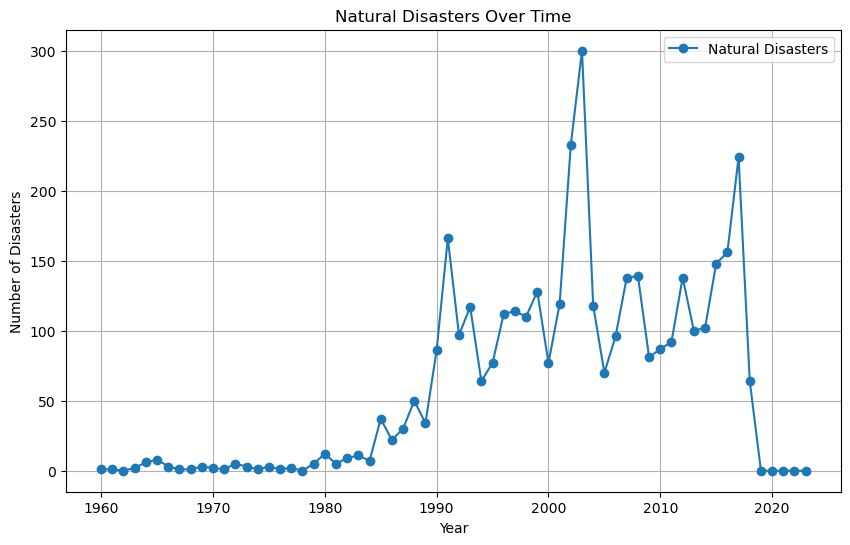

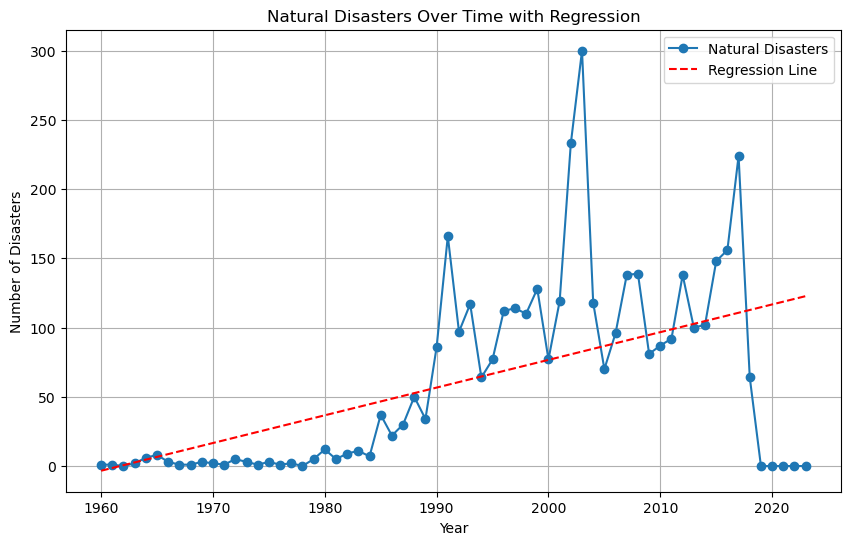

Natural Disasters Linear Regression Slope: 2.0018086080586093


In [492]:
natural_disasters_by_year = merged_data.groupby('year')['disaster_id'].count()

plt.figure(figsize=(10, 6))
plt.plot(natural_disasters_by_year.index, natural_disasters_by_year.values, marker='o', label='Natural Disasters')

plt.title('Natural Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid(True)
plt.show()

# prep data for regression
natural_disasters_by_year = natural_disasters_by_year.dropna()

X_disasters = natural_disasters_by_year.index.values.reshape(-1, 1)  # independent variable (years)
y_disasters = natural_disasters_by_year.values  # dependent variable (num of disasters)

# linear regression model
disaster_model = LinearRegression()
disaster_model.fit(X_disasters, y_disasters)
disaster_predicted = disaster_model.predict(X_disasters)

# plot with regression line
plt.figure(figsize=(10, 6))
plt.plot(natural_disasters_by_year.index, natural_disasters_by_year.values, marker='o', label='Natural Disasters')
plt.plot(natural_disasters_by_year.index, disaster_predicted, linestyle='--', color='red', label='Regression Line')

plt.title('Natural Disasters Over Time with Regression')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid(True)
plt.show()

print(f"Natural Disasters Linear Regression Slope: {disaster_model.coef_[0]}")


Natural disasters from 2000

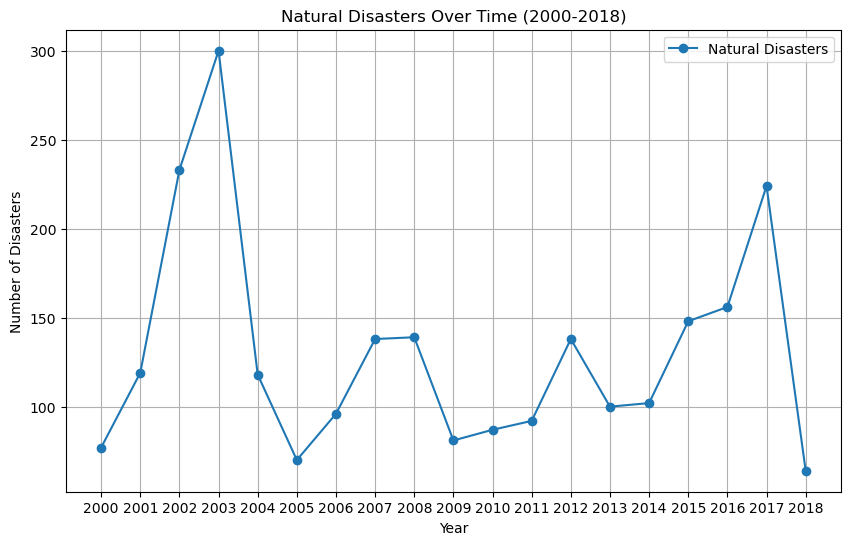

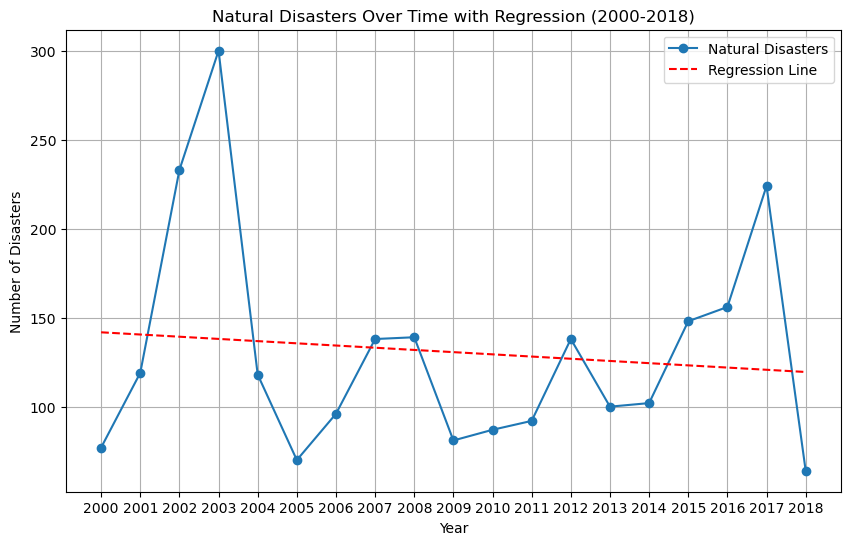

Natural Disasters Linear Regression Slope: -1.2385964912280703


In [493]:
natural_disasters_by_year = merged_data.groupby('year')['disaster_id'].count()

# years from 2000 to 2018
natural_disasters_since2000 = natural_disasters_by_year[(natural_disasters_by_year.index >= 2000) & 
                                                         (natural_disasters_by_year.index <= 2018)]

# natural disasters trend over time (2000-2018)
plt.figure(figsize=(10, 6))
plt.plot(natural_disasters_since2000.index, natural_disasters_since2000.values, marker='o', label='Natural Disasters')

plt.title('Natural Disasters Over Time (2000-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(range(2000, 2019))
plt.legend()
plt.grid(True)
plt.show()

# prep data for regression
natural_disasters_since2000 = natural_disasters_since2000.dropna()

X_disasters = natural_disasters_since2000.index.values.reshape(-1, 1)  # independent variable (years)
y_disasters = natural_disasters_since2000.values  # dependent variable (Number of Disasters)

# linear regression model
disaster_model = LinearRegression()
disaster_model.fit(X_disasters, y_disasters)
disaster_predicted = disaster_model.predict(X_disasters)

# with regression line
plt.figure(figsize=(10, 6))
plt.plot(natural_disasters_since2000.index, natural_disasters_since2000.values, marker='o', label='Natural Disasters')
plt.plot(natural_disasters_since2000.index, disaster_predicted, linestyle='--', color='red', label='Regression Line')

plt.title('Natural Disasters Over Time with Regression (2000-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(range(2000, 2019))
plt.legend()
plt.grid(True)
plt.show()

print(f"Natural Disasters Linear Regression Slope: {disaster_model.coef_[0]}")



Trend over time for different disaster types

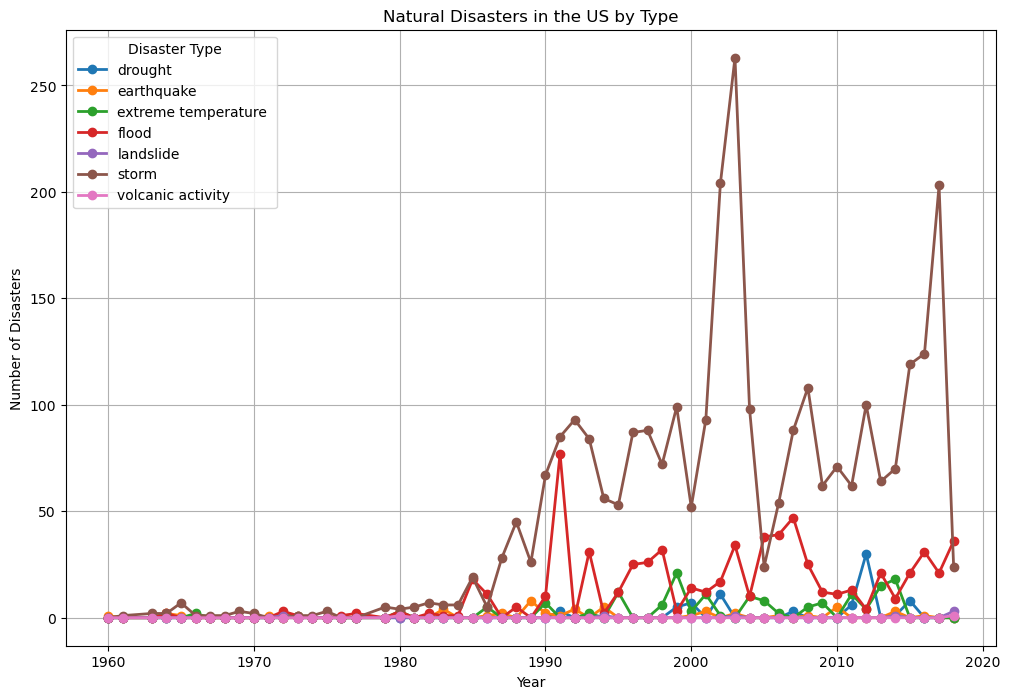

In [494]:
# group by year and disaster type and count the number of disasters
disasters_by_type = merged_data.groupby(['year', 'disastertype'])['disaster_id'].count().unstack(fill_value=0)

# trend over time for different disaster types
plt.figure(figsize=(12, 8))

for disaster_type in disasters_by_type.columns:
    plt.plot(disasters_by_type.index, disasters_by_type[disaster_type], 
             label=disaster_type, marker='o', markersize=6, linewidth=2)

plt.title('Natural Disasters in the US by Type')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.show()

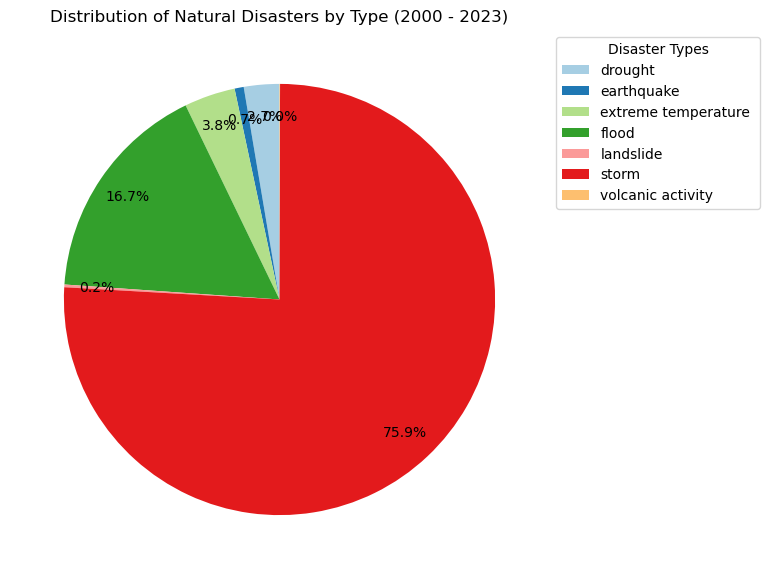

In [495]:
# 2000-2023
filtered_data = merged_data[(merged_data['year'] >= 2000) & (merged_data['year'] <= 2023)]

# disaster type in filtered data
disasters_by_type = filtered_data.groupby('disastertype').size()

#pie chart
plt.figure(figsize=(10, 7))
colors = plt.cm.Paired.colors

wedges, texts, autotexts = plt.pie(
    disasters_by_type, 
    autopct='%1.1f%%',  # Directly format percentages
    startangle=90, 
    colors=colors, 
    pctdistance=0.85
)
plt.title("Distribution of Natural Disasters by Type (2000 - 2023)")

# Key
plt.legend(disasters_by_type.index, title='Disaster Types', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Plot storm data over time since most common

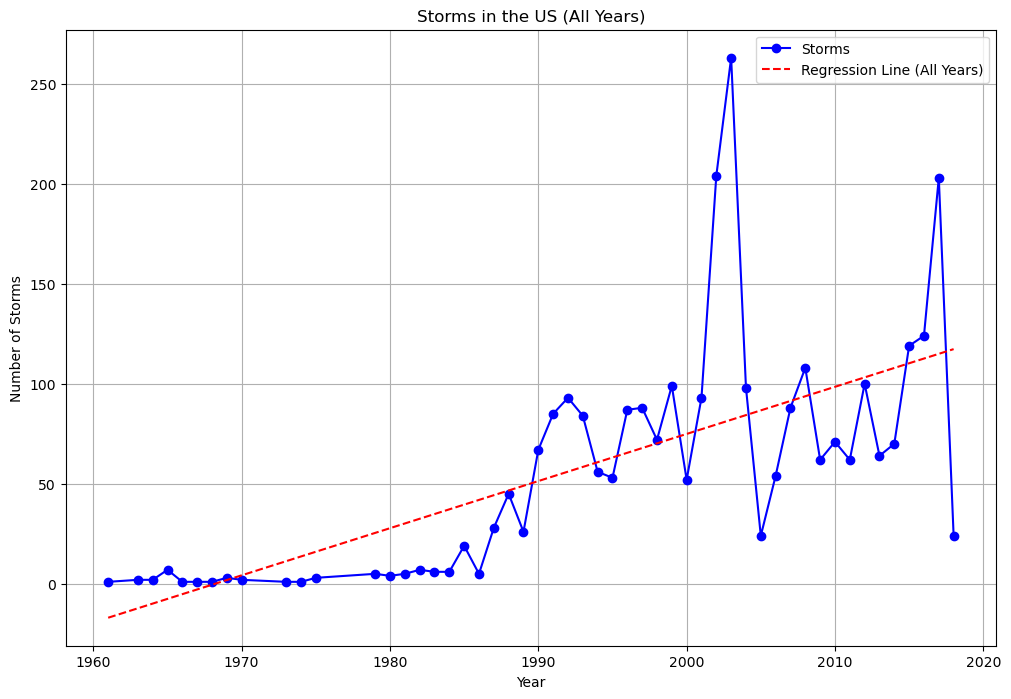

Linear Regression Slope for All Years: 2.355687471440949


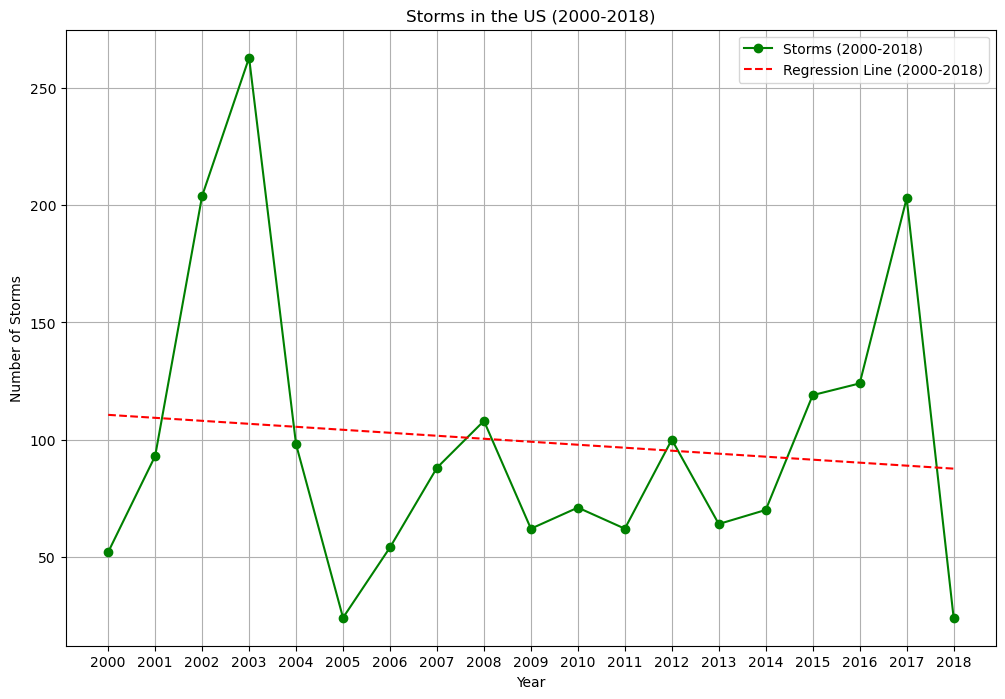

Linear Regression Slope for 2000-2018: -1.2754385964912274


In [496]:
storm_data = merged_data[merged_data['disastertype'] == 'storm']

# group by year and count storms per year
storms_by_year = storm_data.groupby('year')['disaster_id'].count()

# all years
plt.figure(figsize=(12, 8))
plt.plot(storms_by_year.index, storms_by_year.values, marker='o', label='Storms', color='blue')
plt.title('Storms in the US (All Years)')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(True)

# linear regression for all years
X_all = storms_by_year.index.values.reshape(-1, 1)
y_all = storms_by_year.values

# model and predict
regressor_all = LinearRegression()
regressor_all.fit(X_all, y_all)
y_all_pred = regressor_all.predict(X_all)


plt.plot(storms_by_year.index, y_all_pred, linestyle='--', color='red', label='Regression Line (All Years)')
plt.legend()
plt.show()

# slope for all years
print(f"Linear Regression Slope for All Years: {regressor_all.coef_[0]}")

# storm data for 2000-2018
storms_by_year_since2000 = storms_by_year[storms_by_year.index >= 2000]
storms_by_year_since2018 = storms_by_year_since2000[storms_by_year_since2000.index <= 2018]

# plot
plt.figure(figsize=(12, 8))
plt.plot(storms_by_year_since2018.index, storms_by_year_since2018.values, marker='o', label='Storms (2000-2018)', color='green')
plt.title('Storms in the US (2000-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(True)


all_years = list(range(2000, 2019))
plt.xticks(all_years)

# linear regression for 2000-2018
X_since2000 = storms_by_year_since2018.index.values.reshape(-1, 1)
y_since2000 = storms_by_year_since2018.values

regressor_since2000 = LinearRegression()
regressor_since2000.fit(X_since2000, y_since2000)
y_since2000_pred = regressor_since2000.predict(X_since2000)

plt.plot(storms_by_year_since2018.index, y_since2000_pred, linestyle='--', color='red', label='Regression Line (2000-2018)')
plt.legend()
plt.show()

# slope for 2000-2018
print(f"Linear Regression Slope for 2000-2018: {regressor_since2000.coef_[0]}")


Hypothesis Test- Inflation rate effect on home insurance

Null Hypothesis: There is no significant difference between the percentage change in home insurance rates and inflation.(The changes in home insurance rates are independent of inflation rates)

Alternative Hypothesis: There is a significant difference between the percentage change in home insurance rates and inflation rates. (Changes in home insurance rates are related to inflation)

    year  home_insurance_pct_change  inflation_pct_change
0   1998                   0.000000            -33.597734
1   1999                   3.076523             40.955786
2   2000                   3.878272             54.333423
3   2001                   4.583752            -16.307653
4   2002                   6.001478            -43.880552
5   2003                  11.811463             43.130498
6   2004                   7.944625             17.935008
7   2005                   5.095321             26.725696
8   2006                   2.649516             -4.916451
9   2007                   1.911749            -11.570926
10  2008                   1.649940             34.579077
11  2009                   2.631171           -109.261187
12  2010                   3.067392           -561.274269
13  2011                   2.922348             92.485241
14  2012                   3.371160            -34.449125
15  2013                   3.192320            -29.212474
16  2014      

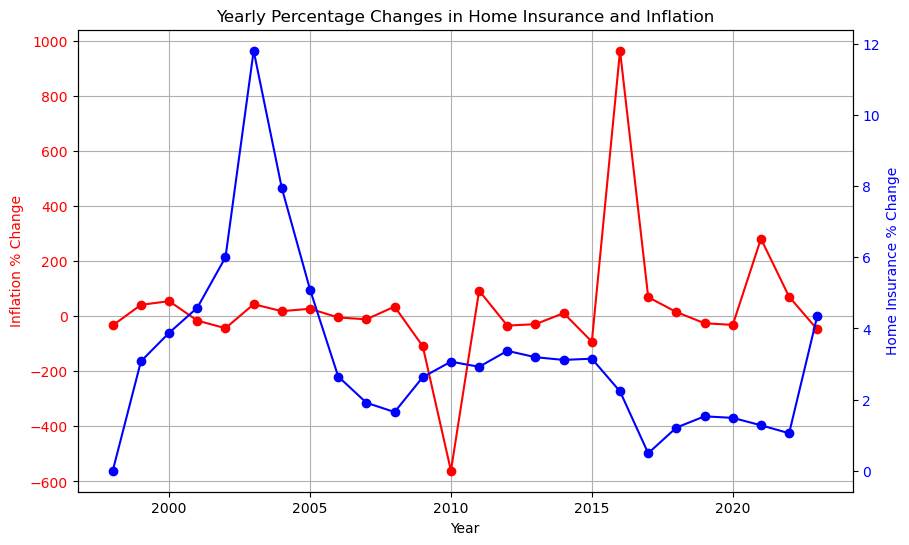

In [497]:
from scipy.stats import ttest_rel

if 'year' not in inflation_data.columns:
    inflation_data['year'] = pd.to_datetime(inflation_data['observation_date']).dt.year

inflation_yearly = inflation_data.groupby('year')['inflation_rate'].mean().reset_index()
inflation_yearly['inflation_pct_change'] = inflation_yearly['inflation_rate'].pct_change() * 100

home_data['observation_date'] = pd.to_datetime(home_data['observation_date'])
home_data['year'] = home_data['observation_date'].dt.year

# grpup by year and calculate the average Home Insurance PPI per year
home_yearly = home_data.groupby('year')['Home_Insurance_PPI'].mean().reset_index()

#  yearly percentage change for home insurance
home_yearly['home_insurance_pct_change'] = home_yearly['Home_Insurance_PPI'].pct_change() * 100

home_yearly['home_insurance_pct_change'] = home_yearly['home_insurance_pct_change'].fillna(0)


# inflation rate per year
inflation_yearly = inflation_data.groupby('year')['inflation_rate'].mean().reset_index()

# yearly percentage change for inflation data
inflation_yearly['inflation_pct_change'] = inflation_yearly['inflation_rate'].pct_change() * 100

# home insurance and inflation data by year
paired_data = pd.merge(home_yearly[['year', 'home_insurance_pct_change']], 
                        inflation_yearly[['year', 'inflation_pct_change']], 
                        on='year', how='inner')

paired_data.dropna(inplace=True)

print(paired_data[['year', 'home_insurance_pct_change', 'inflation_pct_change']].head(20))

# paird t-test to compare the relationship between home insurance and inflation percentage change
t_stat, p_value = ttest_rel(paired_data['home_insurance_pct_change'], paired_data['inflation_pct_change'])
print(f"Paired t-test results: t-statistic = {t_stat}, p-value = {p_value}")

# plot yearly percentage changes
fig, ax1 = plt.subplots(figsize=(10, 6))

# inflation data (left)
ax1.plot(paired_data['year'], paired_data['inflation_pct_change'], marker='o', linestyle='-', color='r', label='Inflation % Change')
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation % Change', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# home insurance percentage change (right)
ax2 = ax1.twinx()
ax2.plot(paired_data['year'], paired_data['home_insurance_pct_change'], marker='o', linestyle='-', color='b', label='Home Insurance % Change')
ax2.set_ylabel('Home Insurance % Change', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Yearly Percentage Changes in Home Insurance and Inflation')
ax1.grid(True)
plt.show()


Results:

t-statistic ( -0.4969)

p-value (0.6236) greater than .05 so fail to reject null hypothesis (There is no statistically significant difference between the yearly percentage change in home insurance premiums and inflation, suggesting no relationship between the two.)

No statistically significant difference in the percentage changes in home insurance premiums and inflation suggests that the rates of change are similar over time... but there is no relationship between the two.

Hypothesis Test- Disaster rate effect on home insurance

Null Hypothesis: There is no significant difference between the percentage change in home insurance rates and the disaster count. (Changes in home insurance rates are independent of disaster frequency)

Alternative Hypothesis: There is a significant difference between the percentage change in home insurance rates and the disaster count. (Changes in home insurance rates are related to the frequency of disasters)

Paired t-test results: t-statistic = -7.0942703979528945, p-value = 1.9533056878797023e-07


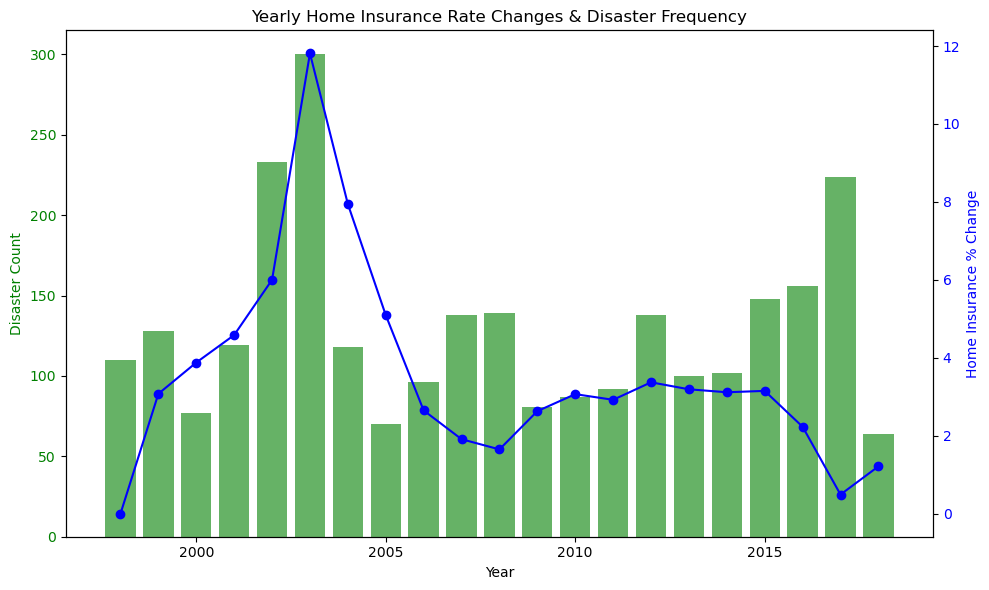

In [498]:
# total disasters per year
disaster_yearly = merged_data.groupby('year')['disaster_id'].count().reset_index()
disaster_yearly.rename(columns={'disaster_id': 'disaster_count'}, inplace=True)

# merge with home insurance data
full_data = pd.merge(home_yearly[['year', 'home_insurance_pct_change']], 
                     disaster_yearly[['year', 'disaster_count']], on='year', how='inner')

# paired t-test for home insurance change and disaster count
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(full_data['home_insurance_pct_change'], full_data['disaster_count'])
print(f"Paired t-test results: t-statistic = {t_stat}, p-value = {p_value}")

# graph until 2018
full_data = full_data[full_data['year'] <= 2018]
# plot of yearly home insurance percentage changes and disaster frequency
fig, ax1 = plt.subplots(figsize=(10, 6))
# disaster count (left)
ax1.bar(full_data['year'], full_data['disaster_count'], alpha=0.6, color='g', label='Disaster Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Disaster Count', color='g')
ax1.tick_params(axis='y', labelcolor='g')
# home insurance percentage change (right)
ax2 = ax1.twinx()
ax2.plot(full_data['year'], full_data['home_insurance_pct_change'], marker='o', linestyle='-', color='b', label='Home Insurance % Change')
ax2.set_ylabel('Home Insurance % Change', color='b')
ax2.tick_params(axis='y', labelcolor='b')
plt.title('Yearly Home Insurance Rate Changes & Disaster Frequency')
fig.tight_layout()
plt.show()

Results:

p-value (1.95e-07) less than .05 so to reject null hypothesis (There is  statistically significant difference between the yearly percentage change in home insurance premiums and disaster count). There is a significant relationship between the home insurance percentage change and disaster frequency.

t-statistic (-7.094) supports the conclusion that home insurance percentage changes and disaster count are related and the relationship is statistcally significant.

There statistically significant evidence that the percentage changes in home insurance premiums and disaster counts have a strong relationship.

Multiple Linear Regression

In [499]:
import statsmodels.api as sm


disaster_yearly = merged_data.groupby('year')['disaster_id'].count().reset_index()
disaster_yearly.rename(columns={'disaster_id': 'disaster_count'}, inplace=True)


full_data = pd.merge(paired_data, disaster_yearly, on='year', how='inner')


# independent variables (inflation percentage change and disaster count)
X = full_data[['inflation_pct_change', 'disaster_count']]
X = sm.add_constant(X)


# dependent variable (home insurance percentage change)
y = full_data['home_insurance_pct_change']


# multiple linear regression model
model = sm.OLS(y, X).fit()


print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"Coefficients:\n{model.params}")
print(f"P-values:\n{model.pvalues}")

R-squared: 0.2735
Adjusted R-squared: 0.2103
Coefficients:
const                   1.445480
inflation_pct_change   -0.001414
disaster_count          0.017303
dtype: float64
P-values:
const                   0.068466
inflation_pct_change    0.462703
disaster_count          0.008025
dtype: float64


R-Squared: 0.2735- Approximately 27.35% of the variation in home insurance percentage change can be explained by the model (inflation percentage change and disaster count).


Adjusted R-squared (more accurate): 0.2103- After adjusting for the number of variables, about 21.03% of the variation is explained. This suggests that the model is a somewhat weak fit.


Inflation_pct_change (-0.0014): A negative coefficient, but the p-value (0.463) indicates it’s not statistically significant, much greater than 0.05, meaning inflation likely does not have a strong impact on home insurance rate changes in this model.


Disaster_count (0.0173): A positive coefficient, and with a p-value of 0.008, it is statistically significant, greater than 0.05. This suggests that disaster frequency does have a significant impact on home insurance percentage changes.
